<center><h1>Altanoveo TP</h1></center>

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import json
from glob import glob
import spacy
from collections import Counter
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow import keras

2022-02-25 18:48:51.401872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 18:48:51.401920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Importation du vocabulaire

In [18]:
nlp = spacy.load("en_core_web_sm")
vocab = list(nlp.vocab.strings)
stop_words = list(nlp.Defaults.stop_words) + ["rt", "click"]

## Fonction de vérification du vocabulaire

In [20]:
def keep_in_voc(sentence):
    en_sentence = [token for token in sentence.split(' ') if token in vocab and token.lower() not in stop_words]
    return ' '.join(en_sentence)

## Importation des données

## Fonction de suppression des émoticons

In [21]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [43]:
texts = pd.DataFrame()
fire_tweets = glob('*/*output_tweet.json')
without_fire_tweets = glob('without_fire/*output*.json')

for tweet in fire_tweets:
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' '))
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

for tweet in without_fire_tweets:
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' '))
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = texts.append({'is_fire': False, 'text': cleaned_text}, ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

texts.head()

/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 't

Erreur : pas de données dans le fichier


/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_1533/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 't

,is_fire,text
0,True,like fires destroying greece
1,True,greece brings control blazes threaten southern...
2,True,trying find fire help understand fires greece ...
3,True,greece brings control blazes threaten southern...
4,True,greece brings control blazes threaten southern...


## Tf-idf

In [44]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(texts['text'])
feature_names = vectorizer.get_feature_names_out()
denselist = vectors.todense().tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
tf_idf

,00,000,01,014,02,03,04,060,07,08,...,zane,zealand,zero,zeus,zimbabwe,zodiac,zoe,zone,zones,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data = pd.concat([texts, tf_idf], axis=1)
data.head()

,is_fire,text,00,000,01,014,02,03,04,060,...,zane,zealand,zero,zeus,zimbabwe,zodiac,zoe,zone,zones,zoo
0,True,like fires destroying greece,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,greece brings control blazes threaten southern...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,trying find fire help understand fires greece ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,greece brings control blazes threaten southern...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,greece brings control blazes threaten southern...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [8]:
X_train, X, y_train, y = train_test_split(np.asarray(vectors.todense()), data['is_fire'], test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50)

## Pénalisation des prédictions des classes

In [48]:
p0 = len(data) / (2 * Counter(data['is_fire'])[False])
p1 = len(data) / (2 * Counter(data['is_fire'])[True])
class_weights = {0: p0, 1: p1}
print(Counter(data['is_fire'])[True])
print(Counter(data['is_fire'])[False])
print('Poids :', class_weights)

3567
Poids : {0: 1.0001401738155313, 1: 0.999859865470852}
ERROR! Session/line number was not unique in database. History logging moved to new session 63


## Modélisation

In [ ]:
clf = DecisionTreeClassifier()#class_weight=class_weights
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

## Matrice de confusion

In [ ]:
confusion_matrix(y_test, clf.predict(X_test))

array([[421,  34],
       [ 10, 522]])

## Schéma de l'arbre de déçision

In [33]:
lemma_tokens = [token.lemma_ for token in nlp(" ".join(texts['text']))]

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(" ".join(lemma_tokens))

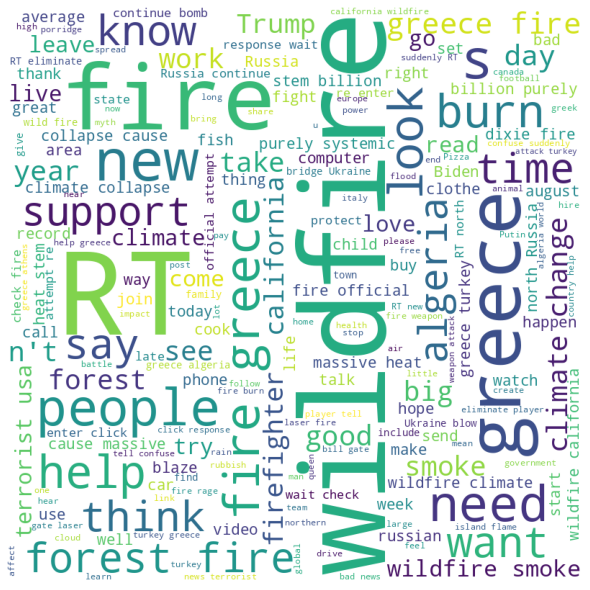

In [34]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(X_train.shape[1]))
model.add(keras.layers.Dense(1000))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(2, activation="sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']    
)

model.summary()

In [1]:
model.fit(
    X_train,
    y_train,
    epochs=2
)